In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
# Create lattice system: 1D

# Set some parameters of our system.  Volume, number of particles, temperature.
V = 20  # Volume of 1D lattice - 20 spaces long
N = 7   # Number of particles in our system.  6 of the 20 sites will be occupied
T = .15 # Dimensionless value of Temperature
steps = 100

# Build our lattice with volume V and put in the N particles:

lattice = np.zeros(V) # Create an array that represents our lattice. 0 = unoccupied.The length is a function of V (volume)
occupied_sites = np.random.choice(V,N,replace=False) # Creates a set of numbers randomlly between 0 and our volume
                        # These numbers will be index positions of our lattice array to be changed to "occupied sites" 

print(occupied_sites) # The index positions to be changed to occupied
for index in occupied_sites: # Takes the occupied site index values, and replaces 0 with a 1 in the lattice array
    lattice[index] = 1       # Our lattice has now been changed from completely empty to one with N # of particles

print(lattice) # The initial (occupied) lattice of the system - The starting point of the simulation
shuff = np.random.shuffle(occupied_sites)
print(shuff)

[11  0 18 13  7  3  8]
[1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.]
None


In [4]:
# Create function to calculate the energy of any given lattice configuration.
# Create a function to attempt a trial move, and decide to accept or refect the move.

# Method that only calculates PE of lattice using already known occupied positions
def energy(occupied):  # Given a set of its occupied positions, calculates the potential energy of the lattice
    
    epsilon = -1
    U = 0
    for i, site1 in enumerate(occupied[:-1]):
        for site2 in occupied[i+1:]:
            if np.absolute(site1-site2) == 1:
                U = U + epsilon
    return U

# Method that checks every site of the lattice - Takes 2-3x longer than the above method
# Shows the effect that 
def energy2(lattice):
    
    epsilon = -1
    U = 0
    for n in range(0,V-1):
        if lattice[n] + lattice[n+1] == 2:
            U = U + epsilon
    return U

# The trial move function.  Accept or reject, and provides updated lattice configuration and PE
def trial_move(occupied_sites,lattice,T):
    
    Uo = energy(occupied_sites) # The initial PE of the system configuration before the trial move is made.
    np.random.shuffle(occupied_sites) # Changes the ORDER of the values in occupied_sites array.
    old_occupied = occupied_sites[0] # The same as picking an occupied site at random because of the above line of code.
    empty_mask = np.isin(np.arange(V),occupied_sites,invert=True) # Identifies available sites to make a move.
    empty_sites = np.arange(V)[empty_mask] # Creates a new array. Values are index pos of available sites in our lattice
    new_occupied = empty_sites[np.random.randint(len(empty_sites))] # Randomly picks an unoccupied site to make the move to.
    occupied_sites[0] = new_occupied # Replaces one of the previously occupied sites with a new occupied site
    Un = energy(occupied_sites) # Calculates PE using our new arrangement of occupied sites -> The trial move
    
    # Test the outcome to determine if the trial move is accepted or rejected
    if (Un<=Uo) or np.random.random() < np.exp(-(Un-Uo)/T):
        lattice[old_occupied] = 0 # Move is accepted, changes the old occupied site to 0 (unoccupied)
        lattice[new_occupied] = 1 # Mov eis accepted, updates the lattice config to show the new occupied site
        return lattice, occupied_sites, Un # Returns our new lattice config, the updated PE, and updated occupied sites list
    
    occupied_sites[0] = old_occupied # Returns the occupied sites back to how they were since the move is rejected
    return lattice, occupied_sites, Uo # Move rejected, returns the lattice w/o changes, current PE, and occupied site list

def run(lattice,occupied_sites,T,steps):
    
    Ulist = []
    for step in range(steps):
        lattice,occupied_sites,U = trial_move(occupied_sites,lattice,T)
        Ulist.append(U) # List of PE values as the simulation runs
        #if step%20==0:  # Every 10th step
        #    print(step,lattice,U)
            
    PE_sys = np.array(Ulist) # PE of the system
    PE_particle = np.array(Ulist)/N # PE per particle
    
    return PE_sys, PE_particle

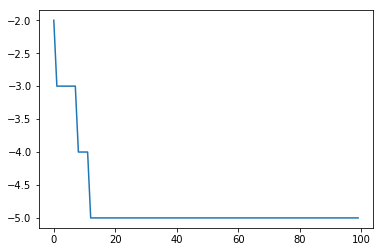

In [5]:
Usys, Uparticle = run(lattice,occupied_sites,T,steps = steps)

fig = plt.figure()
plt.plot(range(steps),Usys)
plt.show()

# 2-Dimensional Lattice Code:

The cells below are my code for a 2D system.  The graphs of PEsys vs step and PEparticle vs step are the outputs.  It also prints out a graphical representation of the initial and final lattice

For now the particles only interact with sites that are directly up, down, left or right of them, so there is no interacting with diagonal neighbors.

In [6]:
# 2D-Array Model:
def fill_lattice(Col,Row,N): # Create our initial randomly configured 2D lattice
    
    size = [np.zeros(Col) for n in range(Row)] # Creates a list of 0 arrays with the size info of lattice (Row x Col)
    sum_of_sites = 0
    while sum_of_sites < N: # Code below might generate duplicate occupied sites, will run until there are no dups.
                # Has to be set up in a away that duplicates are possible as written
        lattice_2d = np.array(size) # Creates an array using the size entered in parms. Empty lattice of zeros.
        occupied_row = np.random.choice(Row,N) # Random row numbers
        occupied_col = np.random.choice(Col,N) # Random col #. If replace=False, then no column with more than 1 particle
        occupied_pos = zip(occupied_row,occupied_col) # Combines random list of rows and cols to create set of coordinates
        occupied_sites = list(occupied_pos)
        for i in occupied_sites:
            lattice_2d[i] = 1  # Add 1s to occupied sites in the 2D array
        sum_of_sites = np.ndarray.sum(lattice_2d) # Check the sum of all sites. Should = N, if < N then there are dupes 
    
    return lattice_2d, occupied_sites

In [7]:
# Calculate the energy of the 2D lattice:
def energy2D(occupied):
# sum diff of 1 - should work in both directions with some tweaking
# Each particle is described by 2 numbers (row,col).
# For neighboring particles sum of their coordinates should only be different by 1
# 2 partcles coord sum can be different by 1 even if they aren't neighbors, need to ignore any non-neighbor particles
    
    epsilon = -1
    U = 0
    for i, site1 in enumerate(occupied[:-1]):
        for site2 in occupied[i+1:]:
            if np.absolute(site1[0]-site2[0]) > 1: # Ignores 1s that aren't in adjacent rows
                pass
            elif np.absolute(site1[1]-site2[1]) > 1: # Ignores 1s not in adjacent columns
                pass
            elif np.absolute(sum(site1)-sum(site2)) == 1:
                U = U + epsilon
    return U

In [8]:
def trial_move2D(lattice,occupied,T):
    
    Uo = energy2D(occupied=occupied) # PE of system before a move is made
    
    # Randomly select occupied pos to be changed
    np.random.shuffle(occupied) # Shuffle our set of occupied sites, randomly putting one at the front of the list
    old_site = occupied[0] # Site selected to be moved is the first item of the shuffled set of occupied sites
    
    # Find all available unoccupied pos
    empty_sites = np.where(lattice == 0)
    empty_sites = list(tuple(zip(*empty_sites))) # Returns list of empty site coordinates
    np.random.shuffle(empty_sites) # Shuffles the list of empty sites
    new_site = empty_sites[0] # Coordinates of the new site the particle will move to
    
    occupied[0] = new_site # Update our set of occupied sites.
    Un = energy2D(occupied) # Check the new PE using the new set of occupied sites
    
    if (Un <= Uo) or np.random.random() < np.exp(-(Un-Uo)/T): # Accept the trial move and change the lattice
        lattice[old_site] = 0  # Update the lattice's occupied positions
        lattice[new_site] = 1
        return lattice, occupied, Un
    
    else:
        occupied[0] = old_site # If statement above doesn't happen, return occupied sites back to before.
        return lattice, occupied, Uo # Rejects move, returns lattice and occupied sites unchanged.
   

In [9]:
def run2D(Row,Col,N,steps,T):
    
    # Create initial lattice and list of occupied sites:
    lattice,occupied_sites = fill_lattice(Col=Col, Row=Row, N=N)
    plt.ion()
    plt.title('Map of Initial Lattice: White = Particles')
    plt.imshow(lattice, cmap='gray', interpolation='none')
    plt.show()
    print()
 
    #Start making trial moves for the indicated steps
    UList = []
    for step in range(steps):
        lattice,occupied_sites,U = trial_move2D(lattice=lattice,occupied=occupied_sites,T=T)
        UList.append(U)
        if step == range(steps)[-1]:
            plt.ion()
            plt.title('Map of Final Lattice: White = Particles')
            plt.imshow(lattice, cmap='gray', interpolation='none')
            plt.show()
            
    Upart = [i/N for i in UList]
    fig1 = plt.figure()
    plt.title('Potential Energy of System')
    plt.plot(range(steps),UList)
    plt.show()
    
    fig2 = plt.figure()
    plt.title('Potential Energy per Particle')
    plt.plot(range(steps),Upart)
    plt.show()
    
    return UList


def run2D_timed(Row,Col,N,steps,T):  # Same as the func above, but without the graphs, printed lattices, etc..
    #  Used for the code below where I'm determining time required as the # of steps, lattice size, etc.. change

    # Create initial lattice and list of occupied sites:
    lattice,occupied_sites = fill_lattice(Col=Col, Row=Row, N=N)
    
    #Start making trial moves for the indicated steps
    UList = []
    for step in range(steps):
        lattice,occupied_sites,U = trial_move2D(lattice=lattice,occupied=occupied_sites,T=T)
        UList.append(U)
    
    return UList

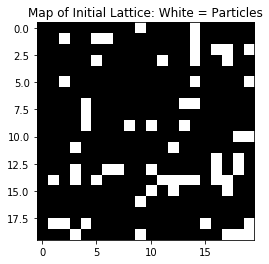

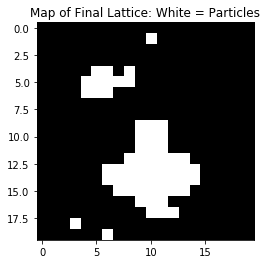

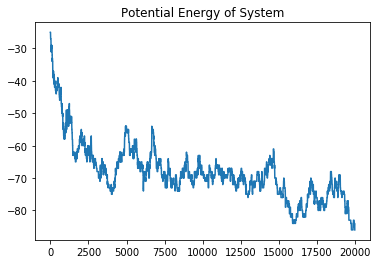

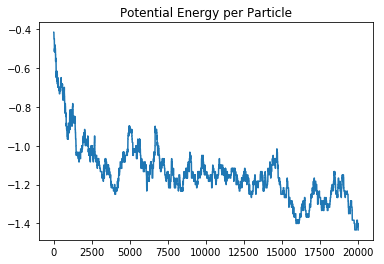

In [10]:
# Run the 2D array simulation here.  
UList = run2D(Row=20,Col=20,N=60,steps=20000,T=.50)

# Scroll down to see all graphs and figures

# Examining Computational Time:
The next few cells run a simulations holding certain parameters fixed and changing others.  The time required to complete a certain amount of cycles is recorded and plotted

Seconds required for each run:
[0.0017974376678466797, 0.01740717887878418, 0.17046117782592773, 1.3598599433898926, 11.980239629745483]


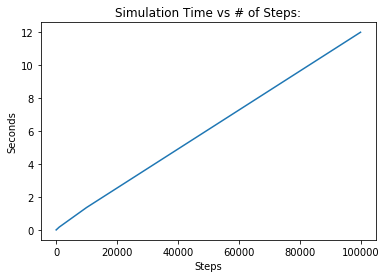

There seems to be a linear relationship with a slope of 0.00012 seconds per step
100,000 steps took about 6665x longer than 10 steps
In hindisght, it seems obvious the relationship would be linear...Im not sure what I was expecting.
I guess its still interesting to get a # for the amount of seconds per step.


In [26]:
# Plot time required as a function of # of steps, lattice dimensions, etc..
# This could take about 1.5 minutes total to run
steps = [10, 100, 1000, 10000, 100000]

seconds = []
for step in steps:
    start = time.time()
    UList = run2D_timed(Row=10,Col=10,N=5,steps=step,T=.30)
    end = time.time()
    seconds.append(end-start)

print('Seconds required for each run:')
print(seconds)
fig = plt.plot()
plt.title('Simulation Time vs # of Steps:')
plt.ylabel('Seconds')
plt.xlabel('Steps')
plt.plot(steps,seconds)
plt.show()

dy = seconds[-1] - seconds[0]
dx = steps[-1] - steps[0]
slope = round(dy/dx,5)

print('There seems to be a linear relationship with a slope of {} seconds per step'.format(slope))
print('100,000 steps took about {}x longer than 10 steps'.format(round(seconds[-1]/seconds[0])))
print('In hindisght, it seems obvious the relationship would be linear...Im not sure what I was expecting.')
print('I guess its still interesting to get a # for the amount of seconds per step.')

Seconds required for each iteration (Constant # of cycles at 100):
[0.018455982208251953, 0.13435721397399902, 0.4662032127380371, 1.9532983303070068, 8.251597166061401]


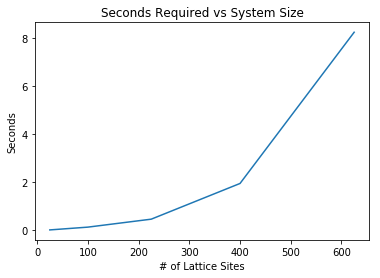

We can see an exponential increase of time required with lattice size
I tried adding a 30x30 lattice with 180 particles, but it couldn't finish running in a reasonable time

Seconds per cycle required for each iteration:
[0.00018455982208251954, 0.0013435721397399903, 0.004662032127380371, 0.01953298330307007, 0.08251597166061402]



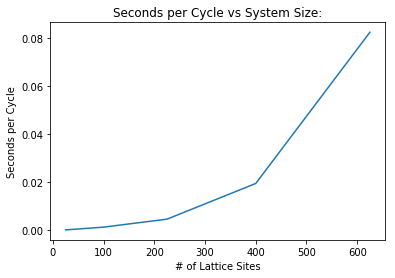

In [27]:
# Plot time required as a function of lattice size. Only going to use square lattices
# Keep the number of particles porportional to lattice size constant
# Keep the number of steps constant
# Takes 1-2 minutes to run!

size = [5, 10, 15, 20, 25] # Edge size of the lattice
N = [5, 20, 45, 80, 125]  # N is 1/5 total available lattice sites
steps = 100

seconds = []
for n in range(len(size)):
    start = time.time()
    UList = run2D_timed(Row=size[n],Col=size[n],N=N[n],steps=steps,T=.30)
    end = time.time()
    seconds.append(end-start)

print('Seconds required for each iteration (Constant # of cycles at {}):'.format(steps))
print(seconds)

fig = plt.figure()
plt.title('Seconds Required vs System Size')
plt.ylabel('Seconds')
plt.xlabel('# of Lattice Sites')
plt.plot([n*n for n in size],seconds)
plt.show()

print('We can see an exponential increase of time required with lattice size')
print("I tried adding a 30x30 lattice with 180 particles, but it couldn't finish running in a reasonable time")
print()

seconds_per_cycle = [n/steps for n in seconds]
fig2 = plt.figure()
plt.title('Seconds per Cycle vs System Size:')
plt.ylabel('Seconds per Cycle')
plt.xlabel('# of Lattice Sites')
plt.plot([n*n for n in size],seconds_per_cycle)
print('Seconds per cycle required for each iteration:')
print(seconds_per_cycle)
print()
plt.show()

# Examining computational time with changing lattice size, but constant particles

Since the example above changed both the size of the array and its number of particles, I wanted to look at each effect individually.  Below the size of the lattice is increased while the number of particles remains constant at 40.

Seconds required for each iteration (Constant # of cycles at 100):
[0.481046199798584, 0.3505260944366455, 0.3271503448486328, 0.3179190158843994]


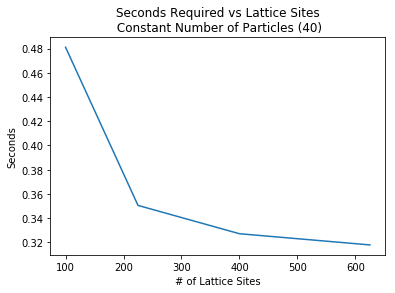

Surprising that the computational time drops at the lattice size increases.
It seems that as the lattice becomes less crowded, the simulation becomes more efficient.


In [28]:
# Determining what has the bigger impact on time.  Lattice Size or # of Particles:

size = [10, 15, 20, 25] # Edge size of the lattice
N = 40
steps = 100

seconds = []
for n in size:
    start = time.time()
    UList = run2D_timed(Row=n,Col=n,N=N,steps=steps,T=.30)
    end = time.time()
    seconds.append(end-start)
    
print('Seconds required for each iteration (Constant # of cycles at {}):'.format(steps))
print(seconds)

fig = plt.figure()
plt.title('Seconds Required vs Lattice Sites\n Constant Number of Particles ({})'.format(N))
plt.ylabel('Seconds')
plt.xlabel('# of Lattice Sites')
plt.plot([n*n for n in size],seconds)
plt.show()

print('Surprising that the computational time drops at the lattice size increases.')
print('It seems that as the lattice becomes less crowded, the simulation becomes more efficient.')



# Examining computational time with number of particles changing at a constant lattice size.

We know that computational time increases with the system size, but that an increase in lattice size doesn't increase the time required.  These results should refelct the exponential increase we see in the very first example.

Seconds required for each iteration (Constant # of cycles at 100):
[0.04315662384033203, 0.053494930267333984, 0.10666966438293457, 0.3567972183227539, 1.204714059829712, 4.756414413452148]


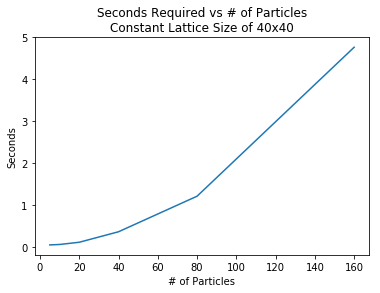

The number of particles in the system seems to be the limiting factor for improving computational time.
What I wonder is the importance of the density of particles is what is the main factor slowing it down
Maybe 160 particles wouldn't take 4x longer than 80 particles if the lattice size was 100x100 instead of 40x40


In [29]:
# Determining what has the bigger impact on time.  Lattice Size or # of Particles:

size = 40 # Edge size of the lattice
N = [5, 10, 20, 40, 80, 160]  # N is 1/5 total available lattice sites
steps = 100

seconds = []
for n in N:
    start = time.time()
    UList = run2D_timed(Row=size,Col=size,N=n,steps=steps,T=.30)
    end = time.time()
    seconds.append(end-start)
    
print('Seconds required for each iteration (Constant # of cycles at {}):'.format(steps))
print(seconds)

fig = plt.figure()
plt.title('Seconds Required vs # of Particles\nConstant Lattice Size of {}x{}'.format(size,size))
plt.ylabel('Seconds')
plt.xlabel('# of Particles')
plt.plot(N,seconds)
plt.show()

print('The number of particles in the system seems to be the limiting factor for improving computational time.')
print('What I wonder is the importance of the density of particles is what is the main factor slowing it down')
print("Maybe 160 particles wouldn't take 4x longer than 80 particles if the lattice size was 100x100 instead of 40x40") 

# Examining the affect of Temperature:
Below are the pictorial representations of the systems, and their PE vs Step graphs at different temperatures

###### System ran for 3,000 cycles at T = 1
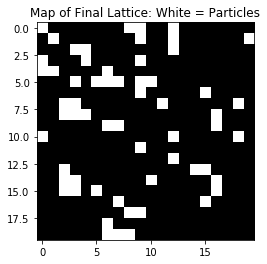

###### System ran for 3,000 cycles at T = .5
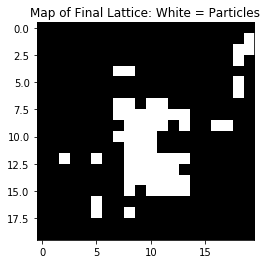

###### System ran for 3,000 cycles at T = .25
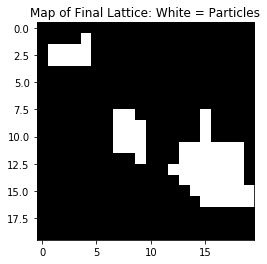

###### System ran for 3,000 cycles at T = .125
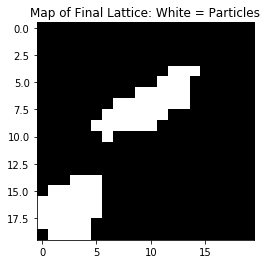

###### The properties of the system seem to change from gas-like to a more condensed phase around a temp of T = 0.70:
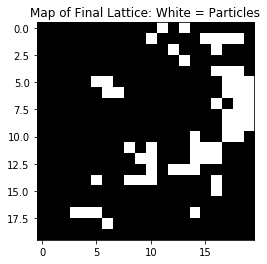

When compared to a temp of T = 0.75:
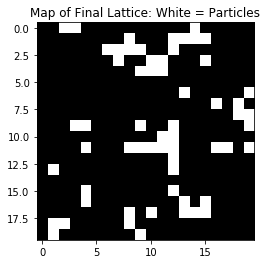


<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>


# Examining the kinetics of the simulation:
Looking at how much it evovles after a certain amount of steps.
Using a 20x20 lattice with 60 particles, Temp = 0.30

###### 250 Cycles:
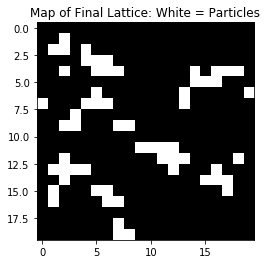

###### 500 Cycles:
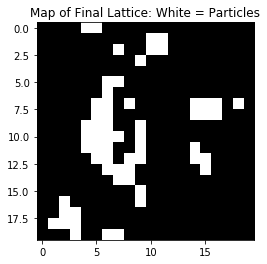

###### 1000 Cycles:
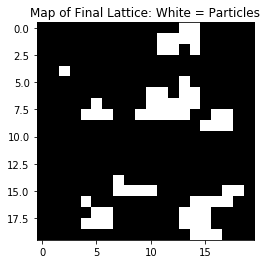

###### 4000 Cycles:
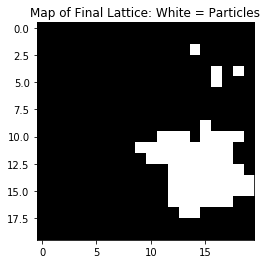

###### 8000 Cycles:
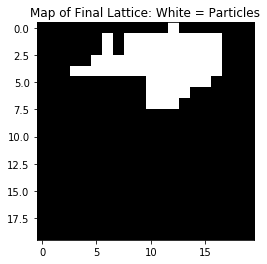

It looks like around 4,000 steps it has reached close to equilibrium.  I ran one simulation for 20,000 steps, and while the particle doesn't change that much, the graph of the potential energy shows that it takes about 10,000 steps to reach equilibrium for a 20x20 system with 60 particles.

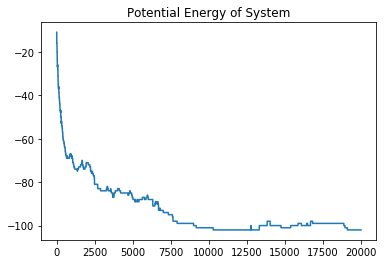

Particle: Not a huge difference between the 4,000 cycle and 8,000 cycle particle. However, this configuraiton seems to have a lower energy than those two.

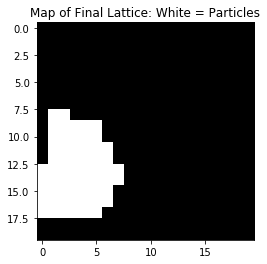
